In [1]:
import cv2
import numpy as np
img = cv2.imread('fin3.jpg',0)
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)



cv2.imshow('img',closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)



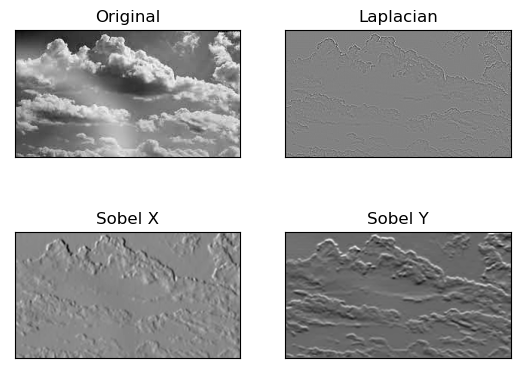

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sky.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


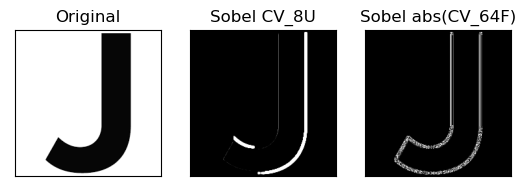

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('j.png',0)
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()



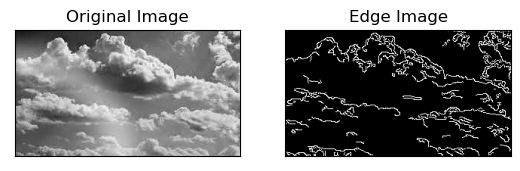

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sky.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


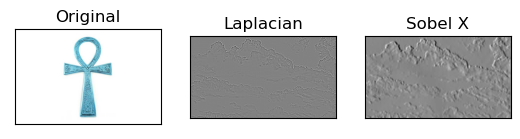

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
im = cv2.imread('ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


In [22]:
import cv2
import numpy as np
img = cv2.imread('ankh.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print (M)


{'m00': 6.0, 'm10': 2238.0, 'm01': 2760.0, 'm20': 834779.0, 'm11': 1029480.0, 'm02': 1269601.6666666665, 'm30': 311376297.0, 'm21': 383998340.0, 'm12': 473561421.6666667, 'm03': 584018300.0, 'mu20': 5.0, 'mu11': 0.0, 'mu02': 1.6666666665114462, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 7.776543498039246e-08, 'mu03': 2.384185791015625e-07, 'nu20': 0.1388888888888889, 'nu11': 0.0, 'nu02': 0.04629629629198462, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 8.818779413312198e-10, 'nu03': 2.7037215925843386e-09}


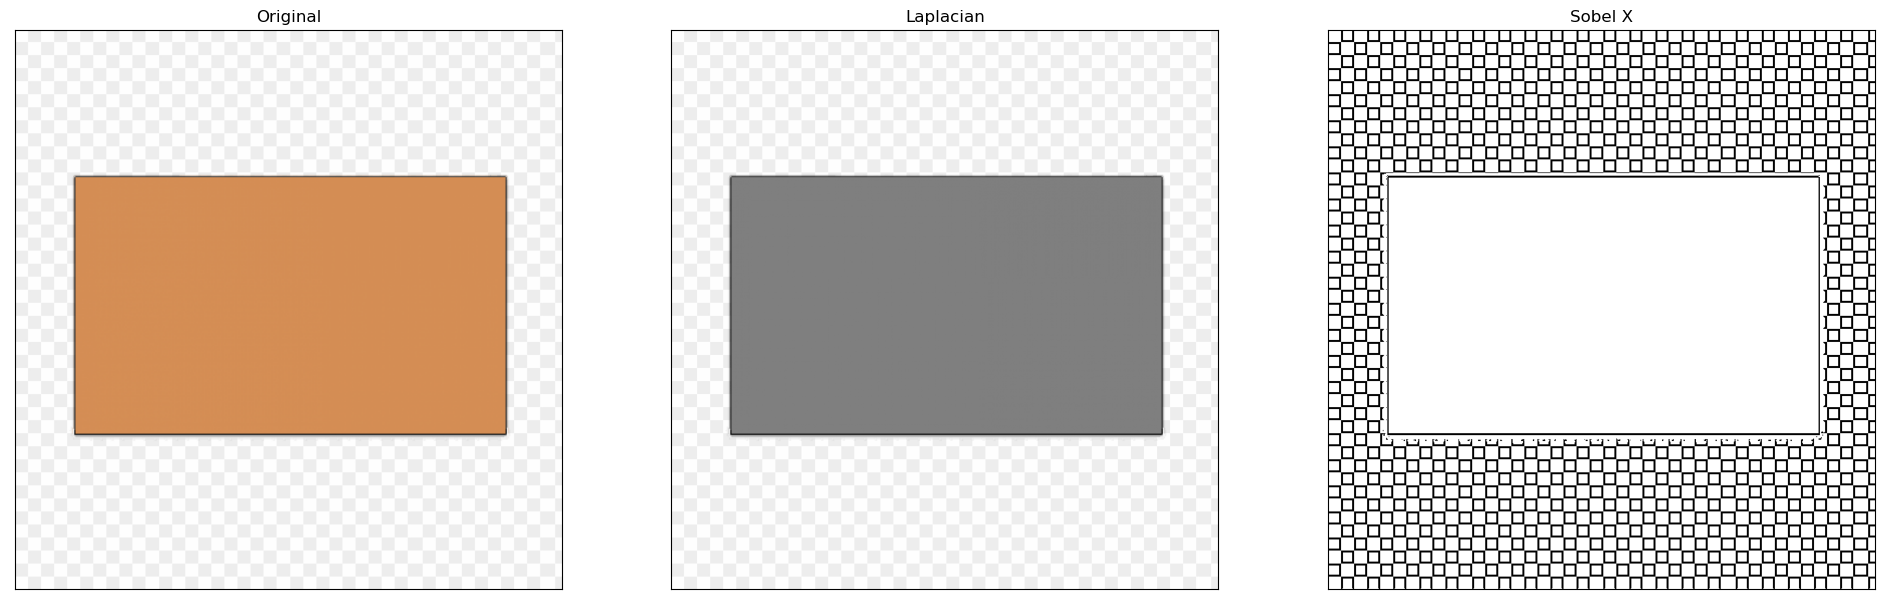

In [27]:
im = cv2.imread('rectangle.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()

In [28]:
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

{'m00': 196.0, 'm10': 147882.0, 'm01': 166705.16666666666, 'm20': 111579762.0, 'm11': 125779048.25, 'm02': 141792547.16666666, 'm30': 84191145066.0, 'm21': 94902667686.55, 'm12': 106982476837.25, 'm03': 120606052485.65001, 'mu20': 2793.000000014901, 'mu11': 1.4901161193847656e-08, 'mu02': 3707.4046202003956, 'mu30': -1.52587890625e-05, 'mu21': 233.30000563664362, 'mu12': -2.200854942202568e-05, 'mu03': -37.41416931152344, 'nu20': 0.07270408163304093, 'nu11': 3.878894521513862e-13, 'nu02': 0.09650678415765293, 'nu30': -2.8371342785929962e-11, 'nu21': 0.0004337850405274654, 'nu12': -4.092147137730126e-11, 'nu03': -6.956582322753062e-05}


In [32]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)



In [31]:
print(area, perimeter)

196.0 58.82842707633972


In [35]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()

In [36]:
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

{'m00': 196.0, 'm10': 147882.0, 'm01': 166705.16666666666, 'm20': 111579762.0, 'm11': 125779048.25, 'm02': 141792547.16666666, 'm30': 84191145066.0, 'm21': 94902667686.55, 'm12': 106982476837.25, 'm03': 120606052485.65001, 'mu20': 2793.000000014901, 'mu11': 1.4901161193847656e-08, 'mu02': 3707.4046202003956, 'mu30': -1.52587890625e-05, 'mu21': 233.30000563664362, 'mu12': -2.200854942202568e-05, 'mu03': -37.41416931152344, 'nu20': 0.07270408163304093, 'nu11': 3.878894521513862e-13, 'nu02': 0.09650678415765293, 'nu30': -2.8371342785929962e-11, 'nu21': 0.0004337850405274654, 'nu12': -4.092147137730126e-11, 'nu03': -6.956582322753062e-05}


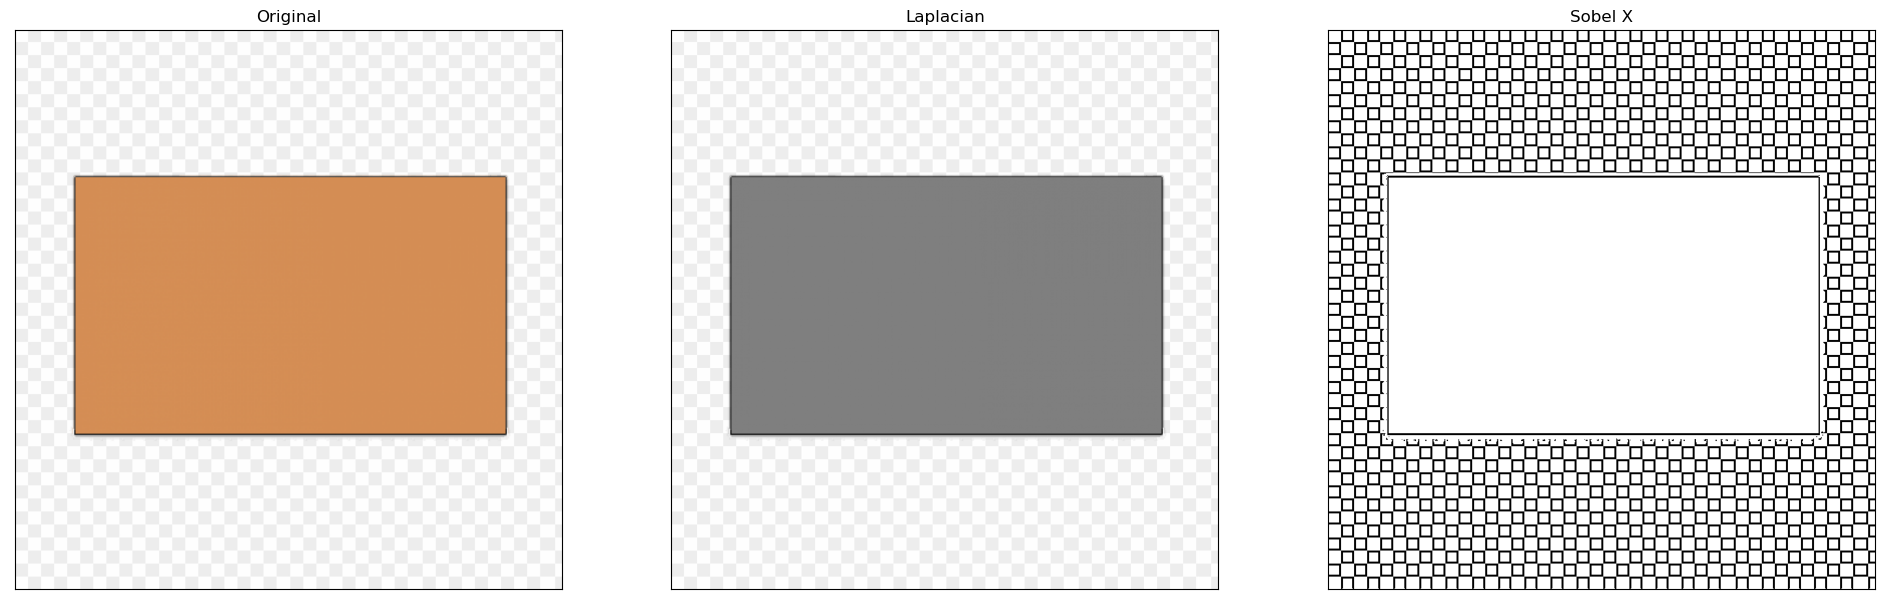

In [40]:
im = cv2.imread('rectangle.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [37]:
print(cnt)

[[[748 843]]

 [[748 857]]

 [[747 858]]

 [[762 858]]

 [[761 857]]

 [[761 843]]]


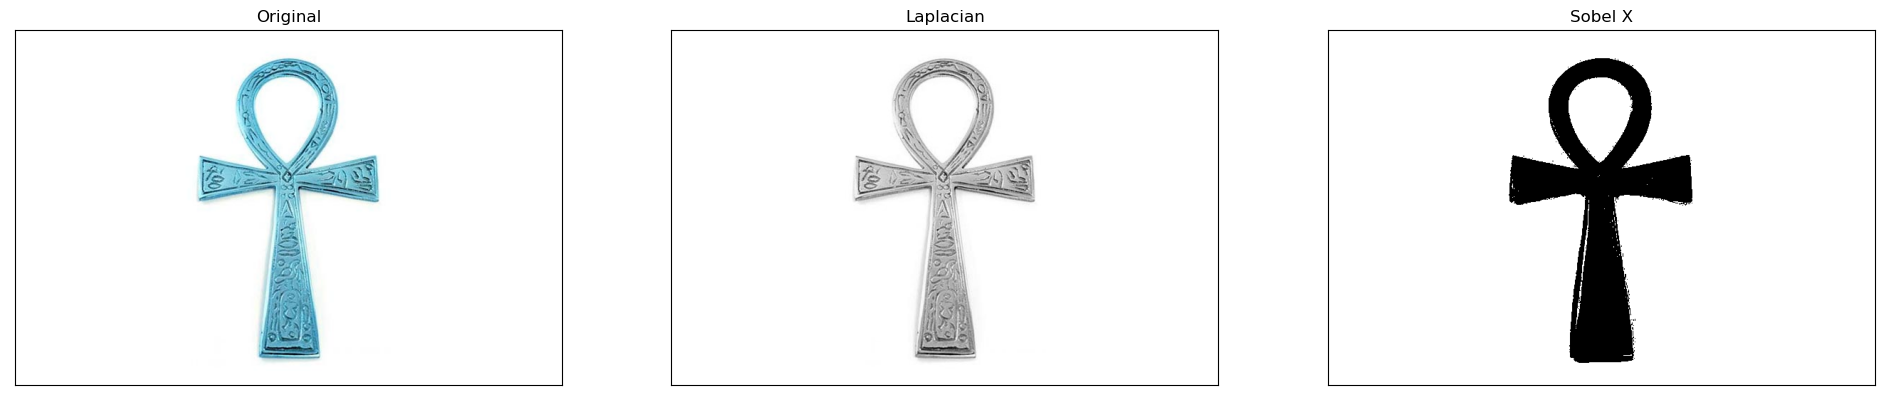

In [43]:
im = cv2.imread('ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray,245,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()